## Problem 1: Visualise data in a static map (10 points)


Create a *static* **thematic map** using the skills you learnt during lesson 5. The map should <br>
contain more than one layer (from at least two different data sets). Pay attention to classification <br>
and visualisation (appropriate colour scheme choice, etc.). Write your code in this notebook, and <br>
store the resulting maps in `.png` format in the `NOTEBOOK_DIRECTORY / "docs"` folder.

### Topic of the map

- Use any of the data sets we have used during the course (travel time data, population grid), or <br>
  any other data set of your interest (for example, [open data sets from Statistics Finland](https://www.stat.fi/org/avoindata/index_en.html), <br>
  or the open geo-data from [the Helsinki Region Infoshare](https://hri.fi/en)). If you download <br>
  data sets, add, commit, and push them to the `DATA_DIRECTORY`. Be sure to include an attribution <br>
  to each data set in your output map!
- Feel free to start from and adapt examples from the course material! You can take one step further <br>
  and add additional analysis to, e.g., the shopping centre dominance or the population within vincinity <br>
  of certain addresses)

### Criteria

- The map has more than one data layer (for instance, the results of an analysis, and the road network <br>
  to illustrate a complex spatial pattern). If (and only if) you think it adds additional value, feel <br>
  free to add a base map (but a base map does not count as an own layer) (2 points)
- The map portrays the output of an analysis or a classification that adds value beyond just displaying <br>
  the raw data (3 points)
- The map follows good cartographic practices (appropriate map extent and zoom level, colour scheme, <br>
  legend and data sources, etc.) (5 points)

### Output

- Save the map(s) in `.png` format in the `NOTEBOOK_DIRECTORY / "docs"` folder, remember to add, commit, <br>
  and push them to the GitHub repository
- Remember to also add, commit, and push input data sets and code

---

In [13]:
import pathlib 
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH / "data"
OUTPUT_DIRECTORY = NOTEBOOK_PATH / "docs"

In [14]:
# downloading NYC transportation data
#https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95/about_data
import datetime
from sodapy import Socrata
import pandas as pd
import geopandas as gpd
import pyarrow as pa
import os
client = Socrata("data.cityofnewyork.us",None, timeout=1000)
dataset_id = "h9gi-nx95"

if os.path.exists(DATA_DIRECTORY/"last_crash_update.txt"):
    df = pd.read_csv(DATA_DIRECTORY/'nyc_crash_data/nyc_crashes_2025-05-25.csv', dtype_backend= 'pyarrow')
else:
    try:
        # Get the most recent 3000000 crash records (you might want to adjust the query)
        results = client.get(dataset_id, limit=3_000_000, order='crash_date DESC')
    
        print(f"Fetched {len(results)} recent crash records.")
        # Process your results here save under "last_crash_update.txt"
        df = pd.DataFrame(results, dtype_backend= 'pyarrow')
    
        df.to_csv(DATA_DIRECTORY/"last_crash_update.txt")
    

    except Exception as e:
        print(f"An error occurred: {e}")


/var/folders/nj/l_35v6rd7yb4qtfyz13w0k_00000gn/T/ipykernel_1303/178444376.py:13: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_DIRECTORY/'nyc_crash_data/nyc_crashes_2025-05-25.csv', dtype_backend= 'pyarrow')


In [15]:
# ADD YOUR OWN CODE HERE

In [16]:
#missing zipcode
df[df["zip_code"].isna()].shape[0]



672336

In [17]:

#creating a geodataframe 
nyc_crashes = gpd.GeoDataFrame(
    data = df,
    geometry = gpd.points_from_xy(df.longitude, df.latitude, crs="EPSG:4326"),
    crs = "EPSG:4326"
)


In [18]:
nyc_crashes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2178109 entries, 0 to 2178108
Data columns (total 31 columns):
 #   Column                         Dtype          
---  ------                         -----          
 0   Unnamed: 0                     int64[pyarrow] 
 1   crash_date                     string[pyarrow]
 2   crash_time                     string[pyarrow]
 3   on_street_name                 string[pyarrow]
 4   off_street_name                string[pyarrow]
 5   number_of_persons_injured      int64[pyarrow] 
 6   number_of_persons_killed       int64[pyarrow] 
 7   number_of_pedestrians_injured  int64[pyarrow] 
 8   number_of_pedestrians_killed   int64[pyarrow] 
 9   number_of_cyclist_injured      int64[pyarrow] 
 10  number_of_cyclist_killed       int64[pyarrow] 
 11  number_of_motorist_injured     int64[pyarrow] 
 12  number_of_motorist_killed      int64[pyarrow] 
 13  contributing_factor_vehicle_1  string[pyarrow]
 14  contributing_factor_vehicle_2  string[pyar

In [19]:
columns_dtypes= {
    'crash_date':'datetime64[ns]',
 'crash_time':'datetime64[ns]',
    'number_of_persons_injured':'Int64',
 'number_of_persons_killed':'Int64',
 'number_of_pedestrians_injured':'Int64',
 'number_of_pedestrians_killed':'Int64',
 'number_of_cyclist_injured':'Int64',
 'number_of_cyclist_killed':'Int64',
 'number_of_motorist_injured':'Int64',
 'number_of_motorist_killed':'Int64',
    'collision_id':'Int64'
}
 

#cleaning data type functions
def data_type_cleaner(dataframe,columns_dtype_dict):
    """function takes a dataframe or geodataframe along with a dictionary of columns
    in the dataframe and their corresponding datatypes, and returns the same 
    dataframe with updated datatypes.
    """
    for key,value in columns_dtype_dict.items():
        dataframe[key] = dataframe[key].astype(value)
    return dataframe

data_type_cleaner(nyc_crashes,
{'crash_date':'datetime64[ns]',
 'crash_time':'datetime64[ns]'})
        

,Unnamed: 0,crash_date,crash_time,on_street_name,off_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,...,longitude,location,contributing_factor_vehicle_3,vehicle_type_code_3,cross_street_name,contributing_factor_vehicle_4,vehicle_type_code_4,contributing_factor_vehicle_5,vehicle_type_code_5,geometry
0,0,2021-09-11,2025-05-26 02:39:00,WHITESTONE EXPRESSWAY,20 AVENUE,2,0,0,0,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT (NaN NaN)
1,1,2022-03-26,2025-05-26 11:45:00,QUEENSBORO BRIDGE UPPER,<NA>,1,0,0,0,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT (NaN NaN)
2,2,2023-11-01,2025-05-26 01:29:00,OCEAN PARKWAY,AVENUE K,1,0,0,0,0,...,-73.970024,"{'latitude': '40.62179', 'longitude': '-73.970...",Unspecified,Sedan,<NA>,<NA>,<NA>,<NA>,<NA>,POINT (-73.97002 40.62179)
3,3,2022-06-29,2025-05-26 06:55:00,THROGS NECK BRIDGE,<NA>,0,0,0,0,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT (NaN NaN)
4,4,2022-09-21,2025-05-26 13:21:00,BROOKLYN BRIDGE,<NA>,0,0,0,0,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT (NaN NaN)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178104,2178104,2025-05-20,2025-05-26 08:30:00,BELT PARKWAY RAMP,<NA>,1,0,0,0,0,...,-73.96866,"{'latitude': '40.583992', 'longitude': '-73.96...",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT (-73.96866 40.58399)
2178105,2178105,2025-05-18,2025-05-26 03:56:00,CLARKSON AVE,E 45 ST,0,0,0,0,0,...,-73.935715,"{'latitude': '40.656303', 'longitude': '-73.93...",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT (-73.93572 40.6563)
2178106,2178106,2025-05-20,2025-05-26 07:40:00,JAMAICA AVE,212 PL,1,0,0,0,0,...,-73.74564,"{'latitude': '40.715958', 'longitude': '-73.74...",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT (-73.74564 40.71596)
2178107,2178107,2025-05-15,2025-05-26 10:00:00,222 ST,MERRICK BLVD,0,0,0,0,0,...,-73.74735,"{'latitude': '40.67843', 'longitude': '-73.747...",Unspecified,Station Wagon/Sport Utility Vehicle,<NA>,<NA>,<NA>,<NA>,<NA>,POINT (-73.74735 40.67843)


In [20]:
#geocode zipcodes
import geopy.geocoders
"""zip_code_dataset_id = 'pri4-ifjk'

try:
    # Get the most recent 3000000 crash records (you might want to adjust the query)
    ny_zipcodes = client.get(zip_code_dataset_id, limit=3_000_000, order='pop_est')

    print(f"Fetched {len(ny_zipcodes)} zip_codes.")


except Exception as e:
    print(f"An error occurred: {e}")"""

 #geocoding was not efficient. Downloading a shape file with of zipcode and spatial join seems to be the best option. 

'zip_code_dataset_id = \'pri4-ifjk\'\n\ntry:\n    # Get the most recent 3000000 crash records (you might want to adjust the query)\n    ny_zipcodes = client.get(zip_code_dataset_id, limit=3_000_000, order=\'pop_est\')\n\n    print(f"Fetched {len(ny_zipcodes)} zip_codes.")\n\n\nexcept Exception as e:\n    print(f"An error occurred: {e}")'

#nyc zipcode map
<iframe src="https://nychealth.github.io/covid-maps/modzcta-geo/about.html" width="800" height="600"></iframe>



In [21]:
#importing the ncy zipcode from https://data.cityofnewyork.us/Health/Modified-Zip-Code-Tabulation-Areas-MODZCTA-/pri4-ifjk/about_data
#Also available on github
nyc_zipcode_geocoded = gpd.read_file("data/Modified Zip Code Tabulation Areas (MODZCTA)_20250524/geo_export_aee478b7-41fe-433a-aa30-1ba3d4663ec2.shp")
nyc_zipcode_geocoded.head()

,modzcta,label,zcta,pop_est,geometry
0,10001,"10001, 10118","10001, 10119, 10199",23072.0,"POLYGON ((-73.98774 40.74407, -73.98819 40.743..."
1,10002,10002,10002,74993.0,"POLYGON ((-73.9975 40.71407, -73.99709 40.7146..."
2,10003,10003,10003,54682.0,"POLYGON ((-73.98864 40.72293, -73.98876 40.722..."
3,10026,10026,10026,39363.0,"MULTIPOLYGON (((-73.96201 40.80551, -73.96007 ..."
4,10004,10004,10004,3028.0,"MULTIPOLYGON (((-74.00827 40.70772, -74.00937 ..."


In [22]:
nyc_nyc_crashes_zipcode_joined = gpd.sjoin(nyc_crashes,
                                           nyc_zipcode_geocoded,
                                          how = 'right',
                                          predicate = 'within',
                                          lsuffix="crashes")


In [23]:
nyc_nyc_crashes_zipcode_joined.columns.to_list()

['index_crashes',
 'Unnamed: 0',
 'crash_date',
 'crash_time',
 'on_street_name',
 'off_street_name',
 'number_of_persons_injured',
 'number_of_persons_killed',
 'number_of_pedestrians_injured',
 'number_of_pedestrians_killed',
 'number_of_cyclist_injured',
 'number_of_cyclist_killed',
 'number_of_motorist_injured',
 'number_of_motorist_killed',
 'contributing_factor_vehicle_1',
 'contributing_factor_vehicle_2',
 'collision_id',
 'vehicle_type_code1',
 'vehicle_type_code2',
 'borough',
 'zip_code',
 'latitude',
 'longitude',
 'location',
 'contributing_factor_vehicle_3',
 'vehicle_type_code_3',
 'cross_street_name',
 'contributing_factor_vehicle_4',
 'vehicle_type_code_4',
 'contributing_factor_vehicle_5',
 'vehicle_type_code_5',
 'modzcta',
 'label',
 'zcta',
 'pop_est',
 'geometry']

In [24]:
nyc_zipcode_geocoded.crs == nyc_crashes.crs

True

In [25]:
crashes_2024 = nyc_nyc_crashes_zipcode_joined[nyc_nyc_crashes_zipcode_joined['crash_date'].dt.year.isin([2024])]



In [26]:
#This operation is not efficient
"""number_crashes_zip_2024 = crashes_2024.dissolve(by = 'modzcta', aggfunc= 'count')
number_crashes_zip_2024['index_crashes'].head()""" 

"number_crashes_zip_2024 = crashes_2024.dissolve(by = 'modzcta', aggfunc= 'count')\nnumber_crashes_zip_2024['index_crashes'].head()"

In [27]:
columns= [
    'collision_id',
  'number_of_persons_injured',
 'number_of_persons_killed',
 'number_of_pedestrians_injured',
 'number_of_pedestrians_killed',
 'number_of_cyclist_injured',
 'number_of_cyclist_killed',
 'number_of_motorist_injured',
 'number_of_motorist_killed',
    'modzcta'#,'crash_date'
]
aggregated_df = nyc_nyc_crashes_zipcode_joined[columns].groupby(['modzcta']).agg(
    total_crashes=('collision_id', 'count'),
    total_persons_injured=('number_of_persons_injured', 'sum'),
    total_persons_killed =('number_of_persons_killed', 'sum'),
 total_pedestrians_injured = ('number_of_pedestrians_injured', 'sum'),
 total_pedestrians_killed =('number_of_pedestrians_killed','sum'),
 total_cyclist_injured= ('number_of_cyclist_injured','sum'),
 total_cyclist_killed = ('number_of_cyclist_killed','sum'),
 total_motorist_injured= ('number_of_motorist_injured','sum'),
 total_motorist_killed = ('number_of_motorist_killed','sum')
).reset_index()

In [28]:
aggregated_df['total_vurnalable_road_users_injured'] = aggregated_df['total_pedestrians_injured']+\
aggregated_df['total_cyclist_injured']

aggregated_df['total_vurnalable_road_users_killed'] = aggregated_df['total_pedestrians_killed']+\
aggregated_df['total_cyclist_killed']

aggregated_df['vru_fatality_rate'] = 100*aggregated_df['total_vurnalable_road_users_killed']/aggregated_df['total_crashes']

aggregated_df['vru_injury_rate'] = 100*aggregated_df['total_vurnalable_road_users_injured']/aggregated_df['total_crashes']

aggregated_gdf =nyc_zipcode_geocoded.merge(aggregated_df,
                                    how= 'left',
                                    on = 'modzcta').to_crs('EPSG:3857')



In [29]:
aggregated_gdf.to_file(DATA_DIRECTORY/"nyc_aggregated_crashes_by_zipcode.gpkg")

In [32]:
"""number_crashes_zip_2024 = aggregated_gdf[aggregated_gdf['crash_date'].dt.year == 2024]
number_crashes_zip_2024=number_crashes_zip_2024.to_crs('EPSG:3857')"""

"number_crashes_zip_2024 = aggregated_gdf[aggregated_gdf['crash_date'].dt.year == 2024]\nnumber_crashes_zip_2024=number_crashes_zip_2024.to_crs('EPSG:3857')"

In [33]:

boroughs_boundaries = gpd.read_file(DATA_DIRECTORY/'nybb_25b/nybb.shp')
boroughs_boundaries.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,325912.288988,1.623618e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,3,Brooklyn,728187.107889,1.934220e+09,"MULTIPOLYGON (((1022227.32 152028.146, 1022078..."
2,4,Queens,887909.387334,3.041417e+09,"MULTIPOLYGON (((1032452.015 154469.237, 103245..."
3,1,Manhattan,360037.633775,6.366460e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,463147.071960,1.187199e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [34]:
#boroughs_boundaries=boroughs_boundaries.reset_index()

borough_colors = {'Manhattan': '#0000ff',
                  'Brooklyn': '#D95F02',
                  'Bronx': '#7570B3',
                  'Queens':'#E7298A',
                  'Staten Island':'#66A61E'}


# Create a column for edge colors based on the 'borough' values
boroughs_boundaries['edge_color_map'] = boroughs_boundaries['BoroName'].map(borough_colors)
boroughs_boundaries= boroughs_boundaries.to_crs('EPSG:3857')

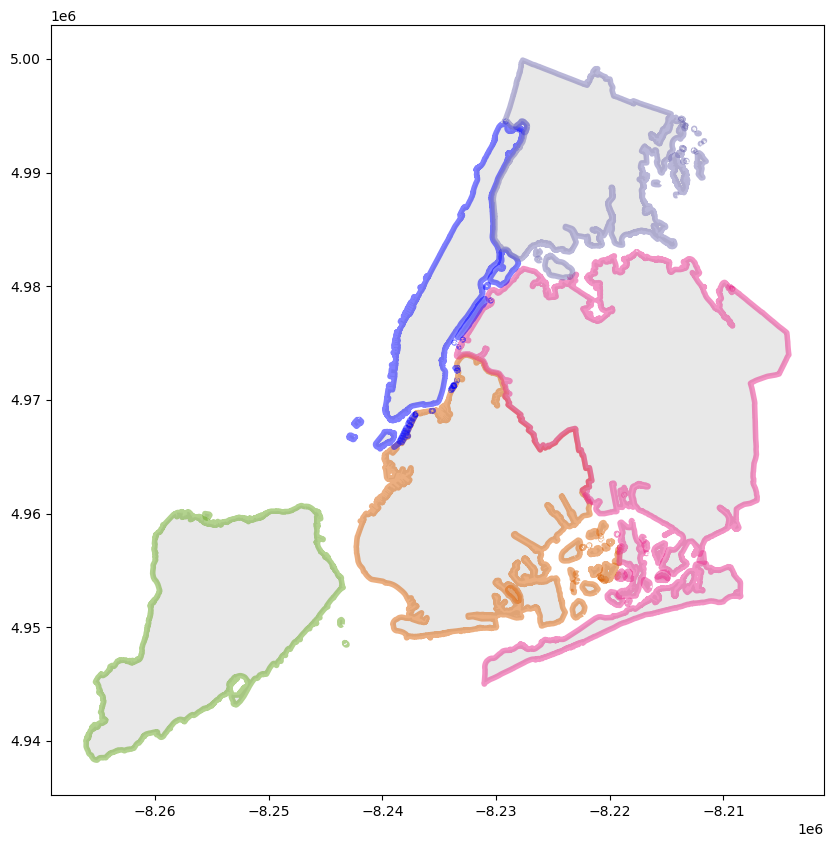

In [36]:
# #fig, ax = plt.subplots(figsize=(14, 10))

# Plotting ONLY boundaries, colored by borough
# Remove the 'column' argument because you're controlling color via 'edgecolor'
nyc_plot = boroughs_boundaries.plot(#ax=ax,
                         facecolor='lightgrey',  # No interior fill
                         edgecolor=boroughs_boundaries['edge_color_map'], # <--- Use the mapped colors here
                         linewidth=4.0,
                         alpha=0.5,
    figsize=(14, 10),
                        legend = True) # Alpha for the boundary lines themselves
"""
#subset not defined.
number_crashes_zip_2024.plot(column = 'vru_injury_rate', 
                             ax = nyc_plot,
                             alpha = 0.2,
                                  cmap= 'RdYlGn_r', 
                                 scheme = "NaturalBreaks",
                             k= 5,
                                 legend = True,
                                 legend_kwds={"title": "Number of Crashes","loc":"upper left"})"""

plt.show()

In [38]:
boroughs_boundaries.to_file(DATA_DIRECTORY/'nyc_buroughs_boundaries.gpkg')

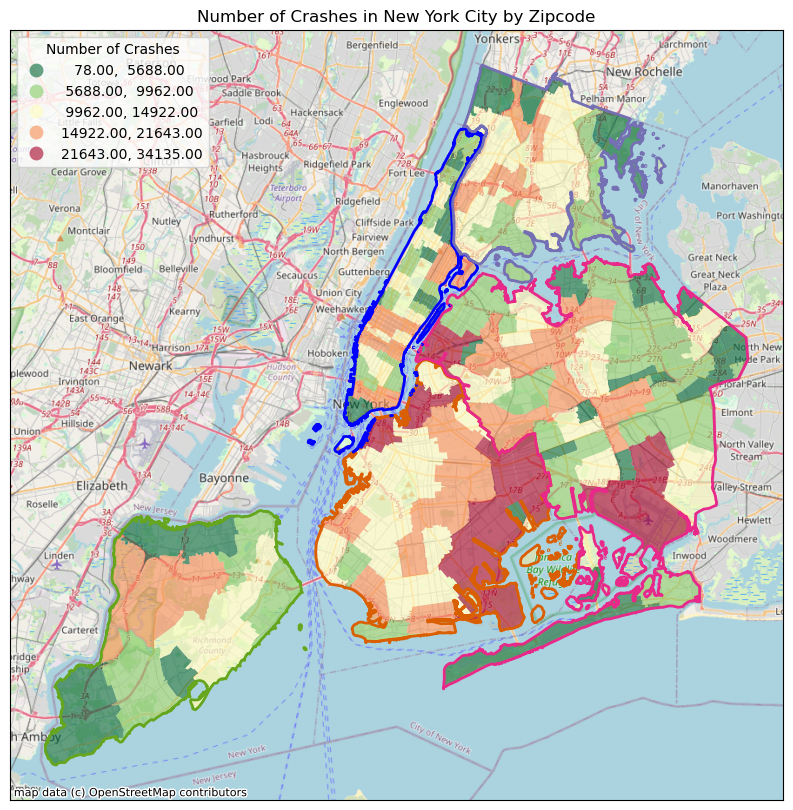

In [39]:
import contextily
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,10))
aggregated_gdf.plot(column = 'total_crashes', 
                             ax = ax,
                                  cmap= 'RdYlGn_r', 
                                 scheme = "NaturalBreaks",
                             alpha = 0.6,
                                 legend = True,
                                 legend_kwds={"title": "Number of Crashes","loc":"upper left"})
boroughs_boundaries.plot(
    ax=ax,
    facecolor = 'none',
    edgecolor = boroughs_boundaries['edge_color_map'],
    linewidth = 2.0,
    legend = True
)
contextily.add_basemap(
    ax,
    source=contextily.providers.OpenStreetMap.Mapnik,
    attribution=(
        "map data (c) OpenStreetMap contributors"
    )
)
ax.set_title("Number of Crashes in New York City by Zipcode")
# Optional: Remove axis ticks and labels for a cleaner map appearance
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])


fig.savefig(DATA_DIRECTORY/"Number of Crashes in New York City by Zipcode.png")

# Display the plot
plt.show()